In [6]:
# importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [7]:
# understanding the dataset
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
# access data attributes
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [12]:
# reshaping data
data = dataset[:,12].reshape(-1,1)

In [13]:
# shape of the data
np.shape(dataset)

(506, 13)

In [14]:
# target values
target = boston.target.reshape(-1,1)

In [15]:
# shape of target
np.shape(target)

(506, 1)

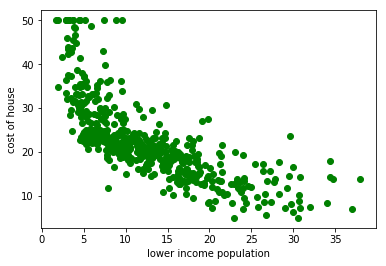

In [16]:
# ensuring that matplotlib is working inside the notebook
%matplotlib inline
plt.scatter(data, target, color='green')
plt.xlabel('lower income population')
plt.ylabel('cost of house')
plt.show()

In [35]:
# regression
from sklearn.linear_model import Lasso

# creating a regression model
reg = Lasso()

#fit the model
reg.fit(data, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
# prediction
pred = reg.predict(data)


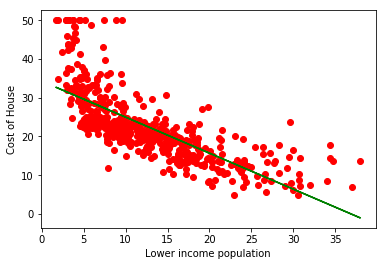

In [37]:
# ensuring that matplotlib is working in the notebook
%matplotlib inline
plt.scatter(data, target, color='red')
plt.plot(data, pred, color='green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [27]:
# circumventing curve issue using polynomial model
from sklearn.preprocessing import PolynomialFeatures

# to allow merging of models
from sklearn.pipeline import make_pipeline

In [28]:
model = make_pipeline(PolynomialFeatures(3),reg)


In [29]:
model.fit(data, target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [30]:
pred = model.predict(data)

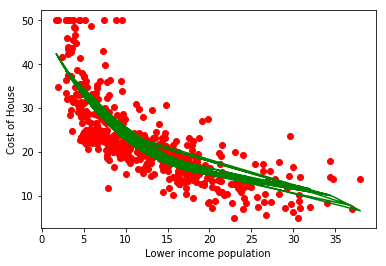

In [31]:
# ensuring that matplotlib is working in the notebook
%matplotlib inline
plt.scatter(data, target, color='red')
plt.plot(data, pred, color='green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [33]:
# r_2 metric
from sklearn.metrics import r2_score

In [34]:
# predict
r2_score(pred, target)

0.47989118102755735